  
  # sklearn documentation on KNN 
   #### class sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2,          metric='minkowski', metric_params=None, n_jobs=None, **kwargs)
   # Classifier implementing the k-nearest neighbors vote.

#   1) Parameters
###   a) n_neighbors: int, default=5
   ######   Number of neighbors to use by default for kneighbors queries.

###   b)weights{‘uniform’, ‘distance’} or callable, default=’uniform’
#####                 weight function used in prediction. Possible values:

#####    ‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.

#####   ‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a         greater influence                     than neighbors which are further away.

#####       [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape            containing the                          weights.

###  c)algorithm{‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’
#####      Algorithm used to compute the nearest neighbors:

#####    ‘ball_tree’ will use BallTree

#####    ‘kd_tree’ will use KDTree

#####    ‘brute’ will use a brute-force search.

#####    ‘auto’ will attempt to decide the most appropriate algorithm based on the values passed to fit method.

#####     Note: fitting on sparse input will override the setting of this parameter, using brute force.

###   d) leaf_size: int, default=30
#####      Leaf size passed to BallTree or KDTree. This can affect the speed of the construction and query, as well as the memory         required to                      store the tree. The optimal value depends on the nature of the problem.

####   e) p: int, default=2
#####          Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and                                                              euclidean_distance (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.

###  f) metric : str or callable, default=’minkowski’
#####        the distance metric to use for the tree. The default metric is minkowski, and with p=2 is equivalent to the                    standard Euclidean                   metric. See the documentation of DistanceMetric for a list of available metrics. If metric is    “precomputed”, X is assumed to be a distance                  matrix and must be square during fit. X may be a sparse graph, in which             case only “nonzero” elements may be considered                               neighbors.

###    g) metric_params: dict, default=None
#####     Additional keyword arguments for the metric function.

###   h) n_jobs: int, default=None
#####    The number of parallel jobs to run for neighbors search. None means 1 unless in a joblib.parallel_backend context. -1 means     using all                   processors. See Glossary for more details. Doesn’t affect fit method.

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

In [2]:
dataset=datasets.load_breast_cancer()
dataset.data,dataset.target,dataset

(array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [3]:
dataset.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For instance,

In [4]:
df=pd.DataFrame(dataset.data)
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [5]:
all_features=dataset.feature_names
all_features,len(all_features)

(array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error',
        'fractal dimension error', 'worst radius', 'worst texture',
        'worst perimeter', 'worst area', 'worst smoothness',
        'worst compactness', 'worst concavity', 'worst concave points',
        'worst symmetry', 'worst fractal dimension'], dtype='<U23'), 30)

In [6]:
df.columns=dataset.feature_names
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [8]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
x_train,x_test,y_train,y_test=train_test_split(df,dataset.target,test_size=0.3)
x_train.shape

(398, 30)

In [10]:
clf=KNeighborsClassifier()
clf.fit(x_train,y_train)

#explanation of each parameters
# note all the parameters values showing in the output is the default value.
# n_neighbor=5  means inbuilt sklearn using default value of k is 5
# metric=minkowski  minkowski distance=  (summation (X1(i)-X2(i))^p)^1/p   and sklearn use default value of p=2,then minkowski
    #distance become Eucledian . if p=1 then minkowski distance become Manhatten 
    
# in metric , if we want ot use our own defined metric function in that case we use the metric_params  which takes a dictionary
   #default value is None 
#  leaf size : it is used for the bal tree and kd tree 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [11]:
clf.score(x_test,y_test)

0.9239766081871345

# note we can write the latex code when the cells are in markdown mode 

 # cross validation 
 
 Once we are done with training our model, we just can’t assume that it is going to work well on data that it has not seen before. In other words, we cant be sure that the model will have the desired accuracy and variance in production environment. We need some kind of assurance of the accuracy of the predictions that our model is putting out. For this, we need to validate our model. This process of deciding whether the numerical results quantifying hypothesised relationships between variables, are acceptable as descriptions of the data, is known as validation.
 
  To evaluate the performance of any machine learning model we need to test it on some unseen data. Based on the models performance on unseen data we can say weather our model is Under-fitting/Over-fitting/Well generalised. Cross validation (CV) is one of the technique used to test the effectiveness of a machine learning models, it is also a re-sampling procedure used to evaluate a model if we have a limited data. To perform CV we need to keep aside a sample/portion of the data on which is do not use to train the model, later us this sample for testing/validating. There are many methods
  
  
# Below are the few common techniques used for CV.

## 1) Train_Test Split approach.
In this approach we randomly split the complete data into training and test sets. Then Perform the model training on the training set and use the test set for validation purpose, ideally split the data into 70:30 or 80:20. With this approach there is a possibility of high bias if we have limited data, because we would miss some information about the data which we have not used for training. If our data is huge and our test sample and train sample has the same distribution then this approach is acceptable.
 
 There is always a need to validate the stability of your machine learning model. I mean you just can’t fit the model to your training data and hope it would accurately work for the real data it has never seen before. You need some kind of assurance that your model has got most of the patterns from the data correct, and its not picking up too much on the noise, or in other words its low on bias and variance.
We can manually split the data into train and test set using slicing or we can use the train_test_split of scikit-learn method for this task.

  x_train,x_test,y_train,y_test=model_selection.train_test_split(datasets.data,datasets.target,test_size=0.3,random_state=10)
  
  here when we change the value of random_state from 10 to other non zero value , then the whole data gets shuffled and split
  randomly . therefore the accuracy of my model will not be stable . it will be fluctuating   and i won't be able to tell my     stackholder that what accuracy is your model is exact.
        for more study visit this link https://towardsdatascience.com/cross-validation-in-machine-learning-72924a69872f


## 2) Leave one out cross-validation(LOO CV)
#  Note : we use cross validation only on training data  not on testing data

  SUPPOSE we have 1000 training data points so in LOO CV METHOD we leave the one data point and train out model on remaining 999 data    points .
#####  itreation 1     [ 1 data point for testing] [999 data point for training] 
#####  itreation 2     [ 1 data point for training] [1 data point for testing] [998 data for training]  so total 999 data for training 
#####  itreation 2     [ 2 data point for training] [1 data point for testing] [997 data for training]  so total 999 data for training 
    ... . . . so on ..
    
### Note: in this case we have to a lot of iteration and it is low baised (leads to overfitting ) . so now a days no one use it 


## 3) K FOLD  cross-validation(K F CV)

  SUPPOSE we have 1000 training data points so in LOO CV METHOD we devide  data point into k parts or we can say it k fold and train the  model on (k-1) fold data and leave one fold for testing .  let say K=4
#####         itreation 1   [fold 1 for testing][fold 2 for training][fold 3 for training][fold 4 for training]  - ->    we get accuracy  score 1
#####         itreation 2   [fold 1 for training][fold 2 for testing][fold 3 for training][fold 4 for training] - ->    we get  accuracy score 2
#####         itreation 3    [fold 1 for training][fold 2 for trianing][fold 3 for testing][fold 4 for training] - ->    we get  accuracy score 3
#####         itreation 4    [fold 1 for training][fold 2 for trianing][fold 3 for training][fold 4 for testing] - ->    we get accuracy score 4

Now eventually  for the final  accuracy score , we find out the mean of all accuracy score 
 ####  final accuracy score =(accuracy  score 1+accuracy  score 2+accuracy  score 3+accuracy  score 4)/4
 #####           now we can say to our stackholder   final score of my model will be final accuracy score . 
 ####      we can also say to our stackholder that , hey the minimum accuracy score of the model is minimum of all accuracy score 
 ####    and maximum accuracy will be maximum of all accuracy score 
 #####       minimum accuracy score=min(accuracy  score 1, accuracy  score 2, accuracy  score 3, accuracy  score 4)
 #####       maximum  accuracy score=max(accuracy  score 1, accuracy  score 2, accuracy  score 3, accuracy  score 4)



### old version  inbuilt sklearn k fold cv uses default value of k=3,  but new version uses k=5 , for which parameter is cv=5

# i am going to use cross validation on iris data and estimator i am going to use linear regression 

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
iris=datasets.load_iris()
xtrain,xtest,ytrain,ytest=train_test_split(iris.data,iris.target,test_size=0.2)
clf1=LinearRegression()
cross_val_score(clf1,xtrain,ytrain,cv=3)
#clf.fit(x_train,y_train)

array([0.95424118, 0.89299528, 0.92820538])

In [13]:
# instead of using training data lets passed the whole data  and lets see the score 
clf2=LinearRegression()
cross_val_score(clf2,iris.data,iris.target,cv=3)
#  here we are getting score 0 . why?(think)
#  ans: below we can see that  in  iris classes of data  first 50 data belong to class 0 and second 50 belongs to class 1
#     and last 50 belongs to class 2 . so in first iteration model is training on the last 100 data (which contains class 1
#     and class 2 only )  and testing on the first 50 data which has class 0 .hence the mismatching happens here . and it's
#     obvious  to get the score 0 . and same on the 2nd iteration and 3rd iteration . 

array([0., 0., 0.])

## to get the non -zero score on iris , we shuffle the data 

In [14]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [15]:
from sklearn.model_selection import KFold   # here lets pass all the data without spliting 
clf2=LinearRegression()
cross_val_score(clf2,iris.data,iris.target,cv=KFold(3,True,0))   # here k=3 , shuffle =true(which shuffle the data) ,
#                                                                 random_state=0

array([0.90322728, 0.92527008, 0.94214064])

# Now comming back to my KNN (above i have discussed some concepts of  cross val score ) 



# Now  how will we decide the optimal value of K.
###  since k=1 it's very prune to overfitting and very  high value of k ,it's always tend to predict the classes which has high value  . for eg , we have two classes a-> total 100 in numbers and b-> total 50 in numbers then in that case for high value of k is always tend to predict class a due to majority of a .  

### so for very low value of k leads to overfitting and very high value of k temds to underfitting 
###  we can't use the testing data for  finding optimal k, because it's only for testing not for calculating any                       parameter

#### so what should be the optimal value of k , show that we can get the best result.

In [16]:
# i already loaded the breast cancer data into the dataset object 
dataset

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [17]:
for i in range(1,26,2):
    clf3=KNeighborsClassifier(n_neighbors=i)              # here i represents the no. of neighbours i.e k value
    score =cross_val_score(clf3,x_train,y_train,cv=3)           #cv=3  , it is kfold value =3
    print(i,"-->",score.mean())                     #score will have 3 element. so lets calculate the mean of all three value. 

1 --> 0.9144831776410723
3 --> 0.9271094402673349
5 --> 0.9346282372598161
7 --> 0.9321029847345637
9 --> 0.9346092503987241
11 --> 0.9295967190704033
13 --> 0.9346282372598161
15 --> 0.9321409584567478
17 --> 0.9321409584567478
19 --> 0.9346472241209084
21 --> 0.9321409584567478
23 --> 0.9270904534062429
25 --> 0.9195526695526696


# lets see it by ploting 

In [18]:
x_axis=[]
y_axis=[]
for i in range(1,26,2):
    clf3=KNeighborsClassifier(n_neighbors=i)          # here i represents the no. of neighbours i.e k value
    x_axis.append(i)            
    score =cross_val_score(clf3,x_train,y_train,cv=3)           #cv=3  , it is kfold value =3
    y_axis.append(score.mean())                     #score will have 3 element. so lets calculate the mean of all three value. 

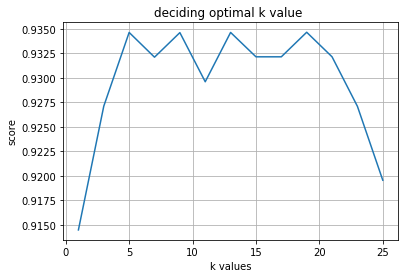

In [30]:
import matplotlib.pyplot as plt
plt.plot(x_axis,y_axis)
plt.title("deciding optimal k value ")
plt.xlabel("k values")
plt.ylabel("score")
plt.grid()
plt.show()     #     in the graph below we can find the optimal k which is around 8

In [20]:
# lets pick k=7 
clf4=KNeighborsClassifier(n_neighbors=7)
clf5=KNeighborsClassifier(n_neighbors=9) 
clf4.fit(x_train,y_train)
clf5.fit(x_train,y_train)
print(clf4.score(x_test,y_test))
print(clf5.score(x_test,y_test))   #  here k=7works well 

0.9239766081871345
0.9239766081871345


#  why does KNN  more computation on test time than on train time?

### Ans:- There is no explicit training phase in KNN . It just takes data as input in its training phase . All the actual work , that is calculation of distances,comparisons and taking out nearest k neighbors is done at testing phase when test data is available. 

# Let me first explain about the counter in python 

In [21]:
from collections import Counter
lis=[1,1,0,2,5,8,2,0,0,0,0,1,1,1,1,1,0,1,0]
Counter(lis) # its return a collection object in which it is giving count of 1 is 8 ,count of 0 is 7,count of 2 is 2,and so on..

Counter({1: 8, 0: 7, 2: 2, 5: 1, 8: 1})

In [22]:
Counter(lis).most_common(2)  # it will return most 2  common element in the list .
                             # it will return a list of tuple object .

[(1, 8), (0, 7)]

In [23]:
Counter(lis).most_common(1)

[(1, 8)]

In [24]:
Counter(lis).most_common(1)[0][0]    #it will give the most common element.

1

# Now it's time to implement our own KNN algorithm. 

In [25]:
import numpy as np
def fit(x_train,y_train):
    return

In [26]:
def predict_one(x_train,y_train,x_test,k):
    distances=[]
    for i in range(len(x_train)):
        distance=((x_train[i,:]-x_test)**2).sum()
        distances.append((distance,i))#here (distance,i) means distance of test data  x_test from ith trainig data is distance
    distances=sorted(distances)
    targets=[]
    for i in range(k):
        targets.append(y_train[distances[i][1]])
    return Counter(targets).most_common(1)[0][0]                                 
    

In [27]:
def predict(x_train,y_train,x_test_data,k):
    predictions=[]
    for x in x_test_data:
        predictions.append(predict_one(x_train,y_train,x,k))
    return predictions

In [35]:
from sklearn.metrics import accuracy_score
X_train,X_test,Y_train,Y_test=train_test_split(dataset.data,dataset.target,random_state=65,test_size=0.2)
y_pred=predict(X_train,Y_train,X_test,7)
accuracy_score(y_pred,Y_test)

0.956140350877193

In [29]:
cl=KNeighborsClassifier(n_neighbors=7)  #from  inbuilt sklearn  i am comparing the score with my own implemented KNN
cl.fit(X_train,Y_train)
Y_pred=cl.predict(X_test)
accuracy_score(y_pred,Y_test)

0.9122807017543859

### here we can see that accuracy score on my implemented KNN and inbuilt SKlearn has same accuracy score